In [1]:
# -*- coding: utf-8 -*-
"""
@author: Lucas Ferro Antunes de Oliveira
"""

'''
This script transform the PUCPR corpus tagset to PennTreebank tagset (with no INFLECTION tags)
https://visl.sdu.dk/visl/pt/info/portsymbol.html
'''

'\nCreated on Tue Dec 11 16:05:23 2018\n\n@author: Lucas Oliveira\n'

In [2]:
# Importing libraries

import matplotlib.pyplot as plt
import io
import collections
import unidecode


In [3]:
_PATH_CORPORA = ""

In [4]:
# Dictionaries to count words and tags in the corpus

dictTags = {}
dictTagsPostNormalization = {}
dictTagsPostNormalization2 = {}

dictPRN = {}
dictART= {}
dictN = {}
dictPREP = {}
dictADV = {}
dictNUM = {}
dictADJ = {}
dictIN = {}
dictNPROP = {}
dictPCP = {}
dictV = {}

In [5]:
# More dictionaries

dictPRN2 = {}
dictART2= {}
dictN2 = {}
dictPREP2 = {}
dictADV2 = {}
dictNUM2 = {}
dictADJ2 = {}
dictIN2 = {}
dictNPROP2 = {}
dictPCP2 = {}
dictV2 = {}

In [6]:
# Create a new corpus file with the adapted tagset

fw = io.open(_PATH_CORPORA + "PUCPR-tagset-adapted-penntreebank-update.txt",'w',encoding='utf8')
fw.write("-DOCSTART- -X- -X- O\n")

21

In [7]:
# Create a new corpus file with the adapted normalized tagset

fw2 = io.open(_PATH_CORPORA + "PUCPR-tagset-adapted-penntrebank-no-accents.txt",'w',encoding='utf8')
fw2.write("-DOCSTART- -X- -X- O\n")

21

In [8]:
# Open corpus

with io.open(_PATH_CORPORA + "corpora\PUCPR.txt",'r',encoding='utf8') as f:
    
    # Get the text
    text = f.read()
    
    # Define replace lists
    # More on https://www.infoescola.com/portugues/pronomes/ and https://www.infoescola.com/portugues/adverbios/
    PRNtoDT = ["esta", "este", "estas", "estes", "isto", "isso", "aquilo", "aquele", "aquela", "aqueles", "aquelas", "meu", "minha", "meus", "minhas", "teu", "tua", "teus", "tuas", "sua", "seu", "suas", "seus", "nosso", "nossa", "nossos", "nossas", "vosso", "vossa", "vossos", "vossas", "cujo", "cuja", "cujos", "cujas", "demais", "os demais", "as demais", "todo", "todos", "qual","alguma","algum","algumas","alguns","outro","outra","outros","outras","mesmo","mesma","mesmos","mesmas","neste","nesta","nestes","nestas","tanto","cada", "quanto", "quantos", "quanta", "quantas"]
    PRNtoPRP = ["eu", "tu", "ele", "ela", "nós", "vós", "eles", "elas", "me", "mim", "comigo", "te", "ti", "contigo", "se", "si", "consigo", "o", "a", "lhe", "nos", "conosco", "vos", "convosco", "os", "as", "lhes", "lo", "la", "los", "las", "mim"]
    PRNtoPRPS = ["meu", "minha", "meus", "minhas", "teu", "tua","teus", "tuas", "nosso", "nossa", "nossos", "nossas", "vosso", "vossa", "vossos", "vossas", "seu", "sua", "seus", "suas"]
        
    #Iterate through sentences
    for s in text.split("\n"):
        
        fw.write("\n")
        
        #Iterate through tokens
        for t in s.split(" "):
            
            item = t.split("_")
             
            word = item[0]
                
            tag = item[1]
            
            dictTags[tag] = dictTags.get(tag, 0) + 1
            
            
            # REPLACE RULES
            
            # 1) ART -> DT (determiners)
            if tag.upper() == "ART":
                if word.lower() == "uterina" and tag.upper() == "ART":  #Specific rule for (uterina == art) / 1 error
                    tag = tag.replace("ART", "ADJ")
                else:
                    tag = tag.replace("ART", "DT")
                    dictART[word] = dictART.get(word, 0) + 1
            
            # 2) IN -> UH (interjections)
            if tag.upper() == "IN":
                dictIN[word] = dictIN.get(word, 0) + 1
                tag = tag.replace("IN", "UH")
            
            # 3) CJ -> CC or IN (Coordinating and subordinating conjunctions)
            if tag.upper() == "CJ":
                if word.lower() == "e" or word.lower() == "ou":  
                    tag = "CC" #e, ou (coordinating conjuctions)
                else:
                    tag = "IN" # "que", "se", "porque", etc (subordinating conjuctions)
    
            # 4) PCP -> VB (past participle -> verb base form)
            if tag.upper() == "PCP":
                tag = tag.replace("PCP", "VB")
                dictPCP[word] = dictPCP.get(word, 0) + 1
            
            # 5) PRN -> (SPEC / PRP / DT / ADJ)
            if tag.upper() == "PRN":
                
                dictPRN[word] = dictPRN.get(word, 0) + 1
                
                if word.lower() in PRNtoDT:  #determiners
                    tag = "DT"
                else:
                    if word.lower() == "próprio":  #specific rule
                        tag = "ADJ"
                    else:
                        if word.lower() in PRNtoPRP:  #personal pronouns 
                            tag = "PRP"
                        else:
                            ###if word.lower() in PRNtoSPEC:  #No matching tag in Penn Treebank Tagset
                                ###tag = "SPEC"
                            ###else:
                            if word.lower() in PRNtoPRPS: #pocessive pronouns
                                tag = "PRP$"
                            else:
                                tag = "DT" #determiners
                                
            # 6) NPROP -> NNP (Proper Nouns Singular)
            if tag.upper() == "NPROP":
                dictNPROP[word] = dictNPROP.get(word, 0) + 1
                tag = tag.replace("NPROP", "NNP") #(Proper Nouns Singular)
                     
            # 7) Rule for "x" when it's tagged as preposition - manually check if it's plural or singular
            if tag.upper() == "PREP" and word.lower() == "x":
                word = word.replace("x", "vezes")
            
            # 8) PREP -> IN (Preposition)
            if tag.upper() == "PREP":
                dictPREP[word] = dictPREP.get(word, 0) + 1
                tag = tag.replace("PREP", "IN")
            
            # 9) N -> NN (noun, singular)
            if len(tag) == 1 and tag == "N":
                if tag.upper() == "N":
                    dictN[word] = dictN.get(word, 0) + 1    
                    tag = tag.replace("N", "NN")
               
            # 10) ADV -> RB (adverb)
            if tag.upper() == "ADV":
                dictADV[word] = dictADV.get(word, 0) + 1
                tag = tag.replace("ADV", "RB")
            
            # 11) NUM -> CD (cardinal numbers)
            if tag.upper() == "NUM":
                dictNUM[word] = dictNUM.get(word, 0) + 1
                tag = tag.replace("NUM", "CD")
            
            # 12) ADJ -> JJ (adjectives)
            if tag.upper() == "ADJ":
                dictADJ[word] = dictADJ.get(word, 0) + 1
                tag = tag.replace("ADJ", "JJ")
            
            # 13) V -> VB (verbs)
            if len(tag) == 1 and tag == "V":
                if tag.upper() == "V":
                    dictV[word] = dictV.get(word, 0) + 1
                    tag = tag.replace("V", "VB") #Verbs on base form
            
            dictTagsPostNormalization[tag] = dictTagsPostNormalization.get(tag, 0) + 1
            
            # Write 
            fw.write(word + " " + tag + " " + "O - O" + "\n")
            
        # Close sentence
        fw.write("")

In [9]:
# Open corpus
with io.open(_PATH_CORPORA + "corpora\PUCPR.txt",'r',encoding='utf8') as f:
    
    # Get the text
    text = f.read()
    
    # Define replace lists
    # More on https://www.infoescola.com/portugues/pronomes/ and https://www.infoescola.com/portugues/adverbios/
    PRNtoDT = ["esta", "este", "estas", "estes", "isto", "isso", "aquilo", "aquele", "aquela", "aqueles", "aquelas", "meu", "minha", "meus", "minhas", "teu", "tua", "teus", "tuas", "sua", "seu", "suas", "seus", "nosso", "nossa", "nossos", "nossas", "vosso", "vossa", "vossos", "vossas", "cujo", "cuja", "cujos", "cujas", "demais", "os demais", "as demais", "todo", "todos", "qual","alguma","algum","algumas","alguns","outro","outra","outros","outras","mesmo","mesma","mesmos","mesmas","neste","nesta","nestes","nestas","tanto","cada", "quanto", "quantos", "quanta", "quantas"]
    PRNtoPRP = ["eu", "tu", "ele", "ela", "nós", "vós", "eles", "elas", "me", "mim", "comigo", "te", "ti", "contigo", "se", "si", "consigo", "o", "a", "lhe", "nos", "conosco", "vos", "convosco", "os", "as", "lhes", "lo", "la", "los", "las", "mim"]
    PRNtoPRPS = ["meu", "minha", "meus", "minhas", "teu", "tua","teus", "tuas", "nosso", "nossa", "nossos", "nossas", "vosso", "vossa", "vossos", "vossas", "seu", "sua", "seus", "suas"]
    ###PRNtoSPEC = ["que", "quem", "nada", "cada um", "as quais", "os quais", "a qual", "o qual", "onde", "todo o mundo"]
    
    #Iterate through sentences
    for s in text.split("\n"):
        
        fw2.write("\n")
        #Iterate through tokens
        for t in s.split(" "):
            
            item = t.split("_")
            
            #normalize accents and cases
            wordNorm = item[0]
            
            for i in wordNorm:
                accented_word = wordNorm
                # accented_word is of type 'unicode'
            
                unaccented_word = unidecode.unidecode(accented_word)
                # unaccented_word contains 'Malaga'and is of type 'str'
                
            for i in unaccented_word:
                lowerword = unaccented_word.lower()
            
            tag2 = item[1]
            
            
            # REPLACE RULES
            
            # 1) ART -> DT (determiners)
            if tag2.upper() == "ART":
                if lowerword.lower() == "uterina" and tag2.upper() == "ART":  #Specific rule for (uterina == art) / 1 error
                    tag2 = tag2.replace("ART", "ADJ")
                else:
                    tag2 = tag2.replace("ART", "DT")
                    dictART2[lowerword] = dictART2.get(lowerword, 0) + 1
                    
            # 2) IN -> UH (interjections)
            if tag2.upper() == "IN":
                dictIN2[lowerword] = dictIN2.get(lowerword, 0) + 1
                tag2 = tag2.replace("IN", "UH")
            
            # 3) CJ -> CC or IN (Coordinating and subordinating conjunctions)
            if tag2.upper() == "CJ":
                if lowerword.lower() == "e" or lowerword.lower() == "ou":  
                    tag2 = "CC" #e, ou (coordinating conjuctions)
                else:
                    tag2 = "IN" # "que", "se", "porque", etc (subordinating conjuctions)
    
            # 4) PCP -> VBN (past participle -> verb base form)
            if tag2.upper() == "PCP":
                tag2 = tag2.replace("PCP", "VB")
                dictPCP2[lowerword] = dictPCP2.get(lowerword, 0) + 1
            
            # 5) PRN -> (SPEC / PRP / DT / ADJ)
            if tag2.upper() == "PRN":
                
                dictPRN2[lowerword] = dictPRN2.get(lowerword, 0) + 1
                
                if lowerword.lower() in PRNtoDT:  #determiners
                    tag2 = "DT"
                else:
                    if lowerword.lower() == "próprio":  #specific rule
                        tag2 = "ADJ"
                    else:
                        if lowerword.lower() in PRNtoPRP:  #personal pronouns 
                            tag2 = "PRP"
                        else:
                            ###if word.lower() in PRNtoSPEC:  #No matching in Penn Treebank
                                ###tag = "SPEC"
                            ###else:
                            if lowerword.lower() in PRNtoPRPS: #pocessive pronouns
                                tag2 = "PRP$"
                            else:
                                tag2 = "DT" #determiners
                            
            # 6) NPROP -> NNP (Proper Nouns Singular)
            if tag2.upper() == "NPROP":
                dictNPROP2[lowerword] = dictNPROP2.get(lowerword, 0) + 1
                tag2 = tag2.replace("NPROP", "NNP") #(Proper Nouns Singular)
            
           
            # 7) Rule for "x" when it's tagged as preposition - manually check if it's plural or singular
            if tag2.upper() == "PREP" and lowerword.lower() == "x":
                lowerword = lowerword.replace("x", "vezes")
            
            # 8) PREP -> IN (Preposition)
            if tag2.upper() == "PREP":
                dictPREP2[lowerword] = dictPREP2.get(lowerword, 0) + 1
                tag2 = tag2.replace("PREP", "IN")
            
            # 9) N -> NN (noun, singular)
            if len(tag2) == 1 and tag2 == "N":
                if tag2.upper() == "N":
                    dictN2[lowerword] = dictN2.get(lowerword, 0) + 1    
                    tag2 = tag2.replace("N", "NN")  #(Noun, Singular)
               
            # 10) ADV -> RB (adverb)
            if tag2.upper() == "ADV":
                dictADV2[lowerword] = dictADV2.get(lowerword, 0) + 1
                tag2 = tag2.replace("ADV", "RB")
            
            # 11) NUM -> CD (cardinal numbers)
            if tag2.upper() == "NUM":
                dictNUM2[lowerword] = dictNUM2.get(lowerword, 0) + 1
                tag2 = tag2.replace("NUM", "CD")
            
            # 12) ADJ -> JJ (adjectives)
            if tag2.upper() == "ADJ":
                dictADJ2[lowerword] = dictADJ2.get(lowerword, 0) + 1
                tag2 = tag2.replace("ADJ", "JJ")
            
            # 13) V -> VB (verbs)
            if len(tag2) == 1 and tag2 == "V":
                if tag2.upper() == "V":
                    dictV2[lowerword] = dictV2.get(lowerword, 0) + 1
                    tag2 = tag2.replace("V", "VB") #Verbs on base form
            
            # Other corrections - Common errors
            
            # If the word isso is labelled as DET (UNIFESP corpus está como SPEC)
                
            #TODO: If you find any other common error - put the correction here
            
            #TODO: normalize multiword expressions like UNIFESP corpus
            
            # Levantzmento pos normalizacao
            dictTagsPostNormalization2[tag2] = dictTagsPostNormalization2.get(tag2, 0) + 1
            
            # Write
            fw2.write(lowerword + " " + tag2 + " " + "O - O" + "\n")
            
        fw2.write("")

In [10]:
fw.close()

In [11]:
fw2.close()

In [12]:
numberoftags = []
for key, value in sorted(dictTagsPostNormalization.items(), key=lambda x:-x[1]):
    numberoftags.append(value)
    
totalnumber = sum(numberoftags)
print(totalnumber)

241348


In [12]:
for key, value in sorted(dictTagsPostNormalization.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

NN = 75465
IN = 37565
JJ = 36189
VB = 17828
CD = 15570
DT = 12817
. = 12695
, = 10128
CC = 5926
RB = 3830
- = 2742
NNP = 2563
) = 1943
: = 1736
( = 1584
; = 627
+ = 474
% = 317
= = 311
> = 243
PRP = 191
=> = 122
/ = 118
? = 116
* = 88
< = 72
-> = 30
! = 25
' = 17
` = 4
[ = 4
??? = 4
] = 2
" = 1
UH = 1


In [13]:
for key, value in sorted(dictTagsPostNormalization2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

NN = 75465
IN = 37565
JJ = 36179
VB = 17828
CD = 15570
DT = 12825
. = 12695
, = 10128
CC = 5926
RB = 3830
- = 2742
NNP = 2563
) = 1943
: = 1736
( = 1584
; = 627
+ = 474
% = 317
= = 311
> = 243
PRP = 193
=> = 122
/ = 118
? = 116
* = 88
< = 72
-> = 30
! = 25
' = 17
` = 4
[ = 4
??? = 4
] = 2
" = 1
UH = 1


In [14]:
for key, value in sorted(dictTags.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

N = 75465
ADJ = 36178
PREP = 36023
NUM = 15570
. = 12695
V = 12558
, = 10128
ART = 9953
CJ = 7468
PCP = 5270
ADV = 3830
PRN = 3066
- = 2742
NPROP = 2563
) = 1943
: = 1736
( = 1584
; = 627
+ = 474
% = 317
= = 311
> = 243
=> = 122
/ = 118
? = 116
* = 88
< = 72
-> = 30
! = 25
' = 17
` = 4
[ = 4
??? = 4
] = 2
" = 1
IN = 1


In [15]:
for key, value in sorted(dictART.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

a = 4084
o = 3866
os = 743
as = 707
A = 218
O = 190
Os = 42
As = 32
um = 20
uma = 15
.O = 11
AS = 8
.A = 5
OS = 3
Uma = 3
.As = 2
;O = 1
.Os = 1
Um = 1


In [16]:
for key, value in sorted(dictART2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

a = 4302
o = 4056
os = 788
as = 747
um = 21
uma = 18
.o = 11
.a = 5
.as = 2
;o = 1
.os = 1


In [17]:
for key, value in sorted(dictPCP.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

Realizada = 157
Realizado = 139
realizado = 133
iniciado = 115
Iniciado = 109
realizada = 102
submetido = 90
prescritas = 88
orientada = 86
suspenso = 65
discutido = 58
Submetido = 56
medicada = 54
submetida = 52
devido = 49
orientado = 48
Orientado = 43
encaminhada = 41
suspensa = 41
internada = 40
Submetida = 40
internado = 38
sido = 37
associada = 36
Solicitado = 36
Orientada = 34
feito = 34
encaminhado = 33
iniciada = 33
Solicitada = 31
Discutido = 29
transferido = 29
associado = 28
aumentado = 24
solicitado = 24
descrito = 23
optado = 22
controlada = 22
deixado = 22
implantado = 22
tratado = 21
trocado = 21
decidido = 21
avaliada = 20
tratada = 20
Avaliado = 20
Avaliada = 20
prescrita = 20
revertida = 20
prescrito = 19
Iniciada = 19
explicado = 19
realizados = 19
proposto = 19
retirado = 18
Encaminhada = 18
recebido = 18
Optado = 18
Devido = 18
solicitada = 18
retirada = 18
inserida = 17
mantido = 17
estimada = 17
mantida = 17
descritos = 17
apresentado = 17
combinado = 16
transfe

In [18]:
for key, value in sorted(dictPCP2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

realizado = 277
realizada = 262
iniciado = 227
submetido = 146
orientada = 120
prescritas = 107
orientado = 95
submetida = 94
discutido = 89
suspenso = 80
devido = 67
encaminhada = 61
solicitado = 60
medicada = 54
solicitada = 53
suspensa = 53
internada = 52
iniciada = 52
encaminhado = 50
internado = 47
feito = 43
optado = 40
avaliada = 40
associada = 38
associado = 38
sido = 37
avaliado = 37
transferido = 36
trocado = 36
prescrito = 35
deixado = 34
mantido = 33
decidido = 31
aumentado = 31
tratado = 30
tratada = 30
realizados = 28
implantado = 28
retirada = 27
mantida = 26
transferida = 25
solicitados = 25
retirado = 24
descrito = 24
manejada = 24
colocado = 23
controlada = 23
indicado = 23
diagnosticado = 22
explicado = 22
recebido = 21
revertida = 21
feita = 20
prescrita = 20
revisado = 20
reduzida = 20
apresentado = 20
constatado = 19
proposto = 19
manejado = 18
indicada = 18
inserida = 17
coletado = 17
estimada = 17
diagnosticada = 17
descritos = 17
combinado = 16
aumentada = 16
p

fixados = 1
receitadas = 1
subestimada = 1
intercalado = 1
testados = 1
identiifcado = 1
reunidos = 1
previstas = 1
explicadas = 1
transplantado = 1
ralizado = 1
encominhado = 1
repetidas = 1
.solicitada = 1
permanecido = 1
ponderadas = 1
manifestado = 1
descompensado = 1
suportado = 1
dirigida = 1
invadido = 1
cedida = 1
titulado = 1
combinada = 1
recebida = 1
fixada = 1
ligadas = 1
reallizado = 1
corigido = 1
cursado = 1
reinternado = 1
oreintado = 1
diagnostica = 1
desviado = 1
depositado = 1
constatada = 1
marcadao = 1
entrgue = 1
pedida = 1
cauterizado = 1
.transferido = 1
alternado = 1
pronado = 1
requerido = 1
adquirido = 1
administrada = 1
anestesiado = 1
autorizada = 1
normalizada = 1
medidos = 1
auscultados = 1
desescalonado = 1
estabelecidos = 1
chegada = 1
citado = 1
institucionalizada = 1
.deixado = 1
ambuzado = 1
chocado = 1
contatada = 1
encontradas = 1
alteradas = 1
inicidao = 1
realcionada = 1


In [19]:
for key, value in sorted(dictPRN.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

-se = 610
que = 604
seu = 179
esta = 128
se = 122
este = 106
sua = 98
qual = 78
ESTE = 65
outras = 61
demais = 53
Demais = 46
mesmo = 42
esse = 33
isso = 32
alguns = 31
outra = 28
qualquer = 27
toda = 26
essa = 26
SE = 26
outros = 26
quanto = 25
todos = 25
seus = 23
suas = 22
SEU = 21
algumas = 20
cujo = 20
quais = 17
ESTA = 16
estes = 14
tal = 14
estas = 13
quaisquer = 12
cada = 11
todas = 11
nenhum = 11
todo = 11
próprio = 10
outro = 10
QUALQUER = 9
tais = 9
esses = 9
Este = 9
-lo = 8
ambas = 8
essas = 8
CONSIGO = 7
nenhuma = 7
Esta = 6
mim = 6
QUE = 6
aquele = 6
aquela = 6
Essa = 5
alguma = 5
algum = 5
-la = 5
NESTE = 5
neste = 4
isto = 4
o = 4
q = 4
mesma = 4
ela = 4
-o = 4
quem = 4
si = 4
NESTA = 4
Esse = 3
tanto = 3
ele = 3
eles = 3
certo = 3
lhe = 3
cuja = 3
Tanto = 3
a = 3
Alguns = 3
OUTRAS = 3
Ambos = 3
Estes = 2
ESSA = 2
cujos = 2
l = 2
á = 2
onde = 2
certa = 2
nosso = 2
-a = 2
DEMAIS = 2
entanto = 2
Estas = 2
OUTROS = 2
TODAS = 2
ESTÁ = 2
DESTE = 2
elas = 2
QUANTO = 2
Se = 2

In [20]:
for key, value in sorted(dictPRN2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

-se = 612
que = 610
seu = 201
este = 180
esta = 152
se = 150
demais = 101
sua = 99
qual = 78
outras = 64
mesmo = 44
esse = 36
qualquer = 36
alguns = 35
essa = 33
isso = 32
outra = 30
outros = 29
toda = 27
quanto = 27
todos = 26
seus = 23
suas = 22
algumas = 21
cujo = 20
quais = 17
estes = 17
tal = 15
estas = 15
todas = 13
quaisquer = 12
outro = 12
cada = 11
nenhum = 11
todo = 11
proprio = 10
esses = 10
neste = 9
-lo = 9
tais = 9
ambas = 8
essas = 8
consigo = 7
nenhuma = 7
tanto = 6
mim = 6
aquele = 6
aquela = 6
alguma = 5
mesma = 5
algum = 5
a = 5
-la = 5
q = 5
nesta = 5
isto = 4
o = 4
ela = 4
-o = 4
quem = 4
si = 4
ambos = 4
ele = 3
eles = 3
certo = 3
lhe = 3
cuja = 3
cujos = 2
l = 2
onde = 2
certa = 2
nosso = 2
-a = 2
algo = 2
entanto = 2
deste = 2
elas = 2
nos = 1
demas = 1
menos = 1
deoutra = 1
dos = 1
net = 1
desta = 1
qquer = 1
pre = 1
pos = 1
nossas = 1
minha = 1
diversos = 1
agora = 1
s = 1
qqer = 1
-los = 1
qu = 1
.esta = 1
coronaria = 1
mesmas = 1
otros = 1
mediante = 1
quatr

In [21]:
for key, value in sorted(dictNPROP.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

Alegre = 209
Porto = 208
Hospital = 141
Clínicas = 110
Zago = 63
Unidade = 29
Terapia = 28
Intensiva = 28
Maria = 28
Jorge = 25
São = 22
Driver = 20
Emergência = 15
Marco = 14
Cardiologia = 13
Pronto = 13
Socorro = 13
Santa = 13
Alexandre = 13
Ribeiro = 13
CREMERS = 12
Paulo = 12
Pinto = 12
Pediátrica = 11
Ana = 11
Dr. = 10
Orlando = 10
João = 10
Lucas = 10
Luis = 10
José = 9
Wender = 7
Posto = 7
Carlos = 7
Antônio = 7
Pedro = 7
MARIA = 7
Fernando = 7
ESCORE = 7
SNAPPEII = 7
Miguel = 6
Saúde = 6
Antoniazzi = 6
Gabriel = 6
Sandler = 6
Ricardo = 6
Casa = 6
Nova = 6
Liberté = 6
Marcelo = 6
Cypher = 6
Maurício = 6
Adão = 6
Nadine = 6
zago = 6
Leandro = 6
Manoel = 5
Canoas = 5
Oncologia = 5
Alcides = 5
Rosa = 5
Hagedorn = 5
Lourdes = 5
Diego = 5
Luiz = 5
Leopoldo = 5
Flávio = 5
Síndrome = 5
Micro = 5
EVEREST = 5
/HCPA = 5
Adriano = 4
Laura = 4
Partenon = 4
Augusto = 4
Rodrigo = 4
Equipe = 4
Nefrologia = 4
Silva = 4
Alvorada = 4
Caramori = 4
York = 4
Novo = 4
Fucks = 4
Bento = 4
Gonçalves = 

In [22]:
for key, value in sorted(dictNPROP2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

alegre = 209
porto = 208
hospital = 141
clinicas = 110
zago = 69
maria = 35
unidade = 29
terapia = 28
intensiva = 28
jorge = 25
sao = 23
driver = 20
emergencia = 15
marco = 14
ana = 14
santa = 14
cardiologia = 13
pronto = 13
socorro = 13
alexandre = 13
ribeiro = 13
luis = 13
cremers = 12
jose = 12
paulo = 12
pinto = 12
joao = 11
lucas = 11
pediatrica = 11
dr. = 10
orlando = 10
pedro = 9
saude = 8
rosa = 8
carlos = 8
wender = 7
posto = 7
antonio = 7
fernando = 7
escore = 7
snappeii = 7
diego = 7
marcelo = 7
lucia = 7
leandro = 7
miguel = 6
micro = 6
antoniazzi = 6
gabriel = 6
sandler = 6
ricardo = 6
casa = 6
nova = 6
novo = 6
liberte = 6
cypher = 6
mauricio = 6
flavio = 6
adao = 6
nadine = 6
beatriz = 6
manoel = 5
terezinha = 5
canoas = 5
silva = 5
oncologia = 5
alcides = 5
hagedorn = 5
hamburgo = 5
lourdes = 5
luiz = 5
leopoldo = 5
sindrome = 5
sergio = 5
everest = 5
/hcpa = 5
alvaro = 4
adriano = 4
laura = 4
partenon = 4
augusto = 4
rodrigo = 4
equipe = 4
nefrologia = 4
alves = 4
alvo

In [23]:
for key, value in sorted(dictPREP.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

de = 12693
em = 5054
com = 4871
a = 3363
para = 1800
por = 1661
sem = 1465
DE = 636
do = 410
Em = 349
após = 329
A = 266
EM = 263
da = 220
Durante = 177
COM = 155
durante = 151
conforme = 137
até = 126
vezes = 108
as = 107
Sem = 104
desde = 97
ao = 81
à = 72
pós = 69
DO = 68
NO = 67
De = 64
sobre = 62
POR = 60
entre = 55
PARA = 54
Conforme = 53
SEM = 50
AO = 47
Com = 47
às = 30
Por = 28
DAS = 25
Ao = 23
CONFORME = 23
apos = 21
sob = 21
apesar = 20
,com = 19
No = 19
Desde = 15
,sem = 15
Após = 14
na = 14
exceto = 13
á = 12
pra = 11
das = 11
segundo = 11
DESDE = 10
pos = 9
como = 9
mediante = 8
Para = 8
.No = 8
DOS = 7
AOS = 7
ocm = 7
ate = 7
DURANTE = 6
Mediante = 6
.Durante = 6
Segundo = 5
NOS = 5
PELA = 4
Até = 4
PELO = 4
.Após = 4
.Na = 4
C = 4
.Sem = 4
X = 4
Á = 4
par = 3
Apos = 3
SOBRE = 3
ENTRE = 3
pós- = 3
om = 3
.Nas = 3
.Com = 3
porém = 3
APÓS = 3
pelo = 3
PÓS = 2
NAS = 2
aoa = 2
aos = 2
,por = 2
coim = 2
Entre = 2
è = 2
Apesar = 2
cfme = 2
cm2,sem = 2
doi = 2
-EM = 2
comm = 2


In [24]:
for key, value in sorted(dictPREP2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

de = 13393
em = 5666
com = 5073
a = 3717
para = 1862
por = 1750
sem = 1620
do = 478
apos = 371
durante = 334
da = 220
conforme = 213
ao = 151
as = 139
ate = 138
desde = 122
vezes = 112
no = 87
pos = 81
sobre = 66
entre = 60
das = 37
apesar = 22
sob = 21
,com = 19
segundo = 16
,sem = 15
mediante = 14
na = 14
exceto = 13
pra = 11
como = 10
aos = 9
.no = 9
dos = 8
pelo = 7
ocm = 7
.durante = 6
nos = 5
pela = 4
.apos = 4
.na = 4
c = 4
porem = 4
.sem = 4
par = 3
pos- = 3
om = 3
.nas = 3
.com = 3
nas = 2
aoa = 2
;com = 2
,por = 2
coim = 2
e = 2
cfme = 2
cm2,sem = 2
doi = 2
-em = 2
comm = 2
sen = 2
.em = 2
)com = 2
numa = 2
imagem = 2
contra = 2
fora = 1
to = 1
per = 1
.da = 1
s = 1
durnate = 1
paa = 1
alo = 1
p = 1
pro = 1
jdesde = 1
apartir = 1
nessa = 1
.desde = 1
durant = 1
:sem = 1
menos = 1
oa = 1
dede = 1
d = 1
sua = 1
)-sem = 1
versus = 1
positivos = 1
abdomem = 1
-ao = 1
epor = 1
cerca = 1
comseu = 1
ded = 1
semn = 1
todavia = 1
cfe = 1
o = 1
atraves = 1
duarante = 1
mediane = 1
/de 

In [25]:
for key, value in sorted(dictN.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

alta = 1108
Paciente = 972
artéria = 871
hipertensão = 675
insuficiência = 589
paciente = 573
anos = 557
dia = 533
tratamento = 529
estado = 473
dor = 467
arterial = 460
intercorrências = 444
angioplastia = 411
lesão = 388
uso = 385
internação = 371
stent = 363
miligrama = 355
dias = 351
via = 350
quadro = 323
coronária = 304
/dia = 299
emergência = 297
avaliação = 272
acompanhamento = 263
sinais = 256
medicações = 253
Hospital = 243
ecocardiograma = 242
função = 240
procedimento = 233
ácido = 229
tomografia = 227
pressão = 226
eletrocardiograma = 223
sucesso = 222
lesões = 219
tipo = 218
exame = 215
retorno = 213
alterações = 209
melhora = 206
diabetes = 204
evolução = 200
médico = 190
Procedimento = 189
Clínicas = 186
realização = 183
ventrículo = 182
controle = 180
fluxo = 178
raio = 177
fibrilação = 174
segmento = 174
tórax = 173
doença = 172
sintomas = 170
fração = 167
átrio = 165
Retorno = 164
acetil = 162
salicílico = 162
horas = 162
ejeção = 162
descendente = 162
ausculta = 158

próximo = 12
hemoglicotestes = 12
creatinoquinase = 12
ecodoppler = 12
monóxido = 12
analgésicos = 12
anticoncepção = 12
ginecologista = 12
lóquios = 12
beta-bloqueador = 12
subcutâneo = 11
Gr = 11
dúvidas = 11
antiinflamatório = 11
anastomose = 11
desidrogenase = 11
outubro = 11
esposa = 11
repercussão = 11
Amiodarona = 11
Conclusão = 11
bronquiolite = 11
comprimento = 11
Marco = 11
crack = 11
atrofia = 11
diagnostico = 11
madrugada = 11
líquor = 11
bloqueador = 11
joelho = 11
ZONA = 11
CIRURGIA = 11
leite = 11
tubo = 11
area = 11
carga = 11
espectro = 11
TIPO = 11
nebulização = 11
dislipidemia = 11
caminhada = 11
irradiação = 11
arritmias = 11
Biópsia = 11
exceto = 11
Neurologia = 11
droga = 11
anlodipina = 11
espirometria = 11
TABAGISTA = 11
Pulsos = 11
prolapso = 11
paralisia = 11
ferroso = 11
ocasião = 11
Fluoxetina = 11
fluconazol = 11
espessuras = 11
amoxicilina = 11
pré-natal = 11
linha = 11
furosemide = 11
Urologia = 11
MITRAL = 11
Ponte = 11
atenolol = 11
canal = 11
psiquiatr

Acidente = 5
Depressão = 5
encefalopatia = 5
alças = 5
músculo = 5
cistocele = 5
Colecistectomia = 5
contratilidade = 5
desconforto = 5
CONTRA = 5
-INDICAÇÃO = 5
TRANSPLANTE = 5
Arteriografia = 5
comum = 5
maneira = 5
baço = 5
LIMITE = 5
Diazepam = 5
loja = 5
ferro = 5
3TC = 5
menor = 5
Cefepime = 5
hematologia = 5
DIII = 5
impossibilidade = 5
p = 5
cabo = 5
Parkinson = 5
rash = 5
Ernesto = 5
Dornelles = 5
Broncoespasmo = 5
operatoria = 5
Fratura = 5
desorientação = 5
Codeína = 5
Refluxo = 5
ecocárdio = 5
todas = 5
apnéia = 5
mamadas = 5
fórmula = 5
alimentar = 5
agendamento = 5
toque = 5
respiratório = 5
betabloqueador = 5
dispositivo = 5
massagem = 5
V3 = 5
comportamento = 5
genta = 5
alcoolismo = 5
mes = 5
ontem = 5
administração = 5
sábado = 5
domingo = 5
tarde = 5
disfagia = 5
estadiamento = 5
aleitamento = 5
nebulizações = 5
hepática = 5
demais = 5
gastresofágico = 5
Metoclopramida = 5
volumes = 5
visceromegalias = 5
redor = 5
amostras = 5
ectasia = 5
esvaziamento = 5
seguir = 5


pois = 3
Medicação = 3
Clonidina = 3
/HAS = 3
encefalo = 3
CA-125 = 3
Pré-natal = 3
NÁUSEAS = 3
ICTERÍCIA = 3
MÊS = 3
adrenais = 3
visão = 3
palpitação = 3
PR = 3
Níveis = 3
ESPIROMETRIA = 3
Indicação = 3
aparecimento = 3
g. = 3
territórios = 3
candidato = 3
descolamento = 3
aminofilina = 3
coagulase = 3
pezinho = 3
.Eco = 3
colônias = 3
prescritas = 3
peritonismo = 3
esposo = 3
pleural = 3
Hiperplasia = 3
SIGMÓIDE = 3
extremidade = 3
cariótipo = 3
cirurgião = 3
ateromatose = 3
Carcinoma = 3
Sertralina = 3
fç = 3
janeir = 3
piperacilina = 3
/tazobactam = 3
diverticulose = 3
secretaria = 3
fluco = 3
estertores = 3
intervenções = 3
Revascularização = 3
caracteristicas = 3
moradia = 3
angiográfico = 3
setembro = 3
INTRASTENT = 3
único = 3
set = 3
sérico = 3
terapeutica = 3
cça = 3
valproico = 3
vávula = 3
safenectomia = 3
aplicação = 3
aortografia = 3
-operatória = 3
seco = 3
Pediatria = 3
Lispro = 3
Grau = 3
pielografia = 3
V1 = 3
/Genta = 3
Imunoglobulina = 3
Enterococcus = 3
levodopa =

resistente = 2
cilindros = 2
ABDOME = 2
mioma = 2
anti-plaquetários = 2
estatinas = 2
Hamburgo = 2
interrogação = 2
Graças = 2
Motivo = 2
Junho = 2
RESTRIÇÃO = 2
min) = 2
neurocirurgia = 2
ALERGIA = 2
umbilical = 2
mandíbula = 2
Stenotrophomonas = 2
coprocultura = 2
esterno = 2
sulco = 2
levofloxacilina = 2
levofloxacin = 2
cav = 2
Bactrin = 2
Hg:10 = 2
.Retorno = 2
sorologia = 2
np = 2
videolaparoscopia = 2
St = 2
v1 = 2
v2 = 2
cadeira = 2
/mL = 2
prata = 2
Afebril = 2
Sulfadiazina = 2
bilhete = 2
entregue = 2
giro = 2
microangiopatia = 2
EME-HCPA = 2
mamada = 2
produto = 2
neurolues = 2
tuberculosis = 2
GLICEMIA = 2
Fabry = 2
intervencao = 2
cardiaca = 2
Púrpura = 2
infusao = 2
oclusao = 2
agora = 2
ERI = 2
Evacuação = 2
peredes = 2
tramento = 2
/AJ = 2
Efavirenz = 2
indício = 2
Mal = 2
INTERNAÇÕES = 2
ABSTINÊNCIA = 2
ate = 2
telangiectasias = 2
istmo = 2
PUSH = 2
Bordetella = 2
Cultural = 2
FRAÇÃO = 2
EJEÇÃO = 2
PERIFÉRICA = 2
TER = 2
apenas = 2
Hematoma = 2
língua = 2
BRONCOPNEUMON

apendice = 1
CONTÍNUO = 1
DETICLOPIDINA = 1
DEMAIS = 1
intrcorrências = 1
Procedica = 1
Marginal = 1
:a = 1
ig:37+2 = 1
.BR = 1
LM, = 1
.Rn = 1
PN:1910g = 1
invsetigação = 1
exercíco = 1
infra-St = 1
BAL = 1
GANCICLOVIR = 1
INFILTRADO = 1
TARATAMENTO = 1
PNEUMO = 1
PROFILATICO = 1
peri-necrose = 1
intravascular = 1
inta-coronário = 1
anerior = 1
crônio = 1
proporção = 1
bloqueadores = 1
Paroxetina = 1
Santuza = 1
microalbuminúria = 1
ampicilina+gentamicina = 1
AntiHB = 1
AntiHBs = 1
Piperacilina+Tazobactam = 1
-Tazo = 1
Pigtail = 1
tromboangiite = 1
sianis = 1
Estigmas = 1
Cortisol = 1
adrenocorticotrófico = 1
>RNM = 1
formato = 1
vír- = 1
gula = 1
comma = 1
adenohipófise = 1
férica = 1
C.O. = 1
:33 = 1
torácico = 1
circ = 1
novembro/06 = 1
Havi = 1
desaturado = 1
direita- = 1
pleurodeseme = 1
epirometria = 1
linfocintigrafia = 1
tramadol = 1
analgésico = 1
assocação = 1
Talassemia = 1
Minor = 1
virada = 1
Hb= = 1
Ht= = 1
Leuc= = 1
Plaq= = 1
mielodisplasia = 1
cisternas = 1
a= = 1
mono

Broncoscopia = 1
toracotomia = 1
caracterização = 1
Presecrição = 1
emergênciase = 1
facoemulsificação = 1
LIO = 1
vitrectomia = 1
vítreo = 1
Ciprofloxacino = 1
novamento = 1
bilis = 1
OFLOXACINO = 1
formula = 1
WR = 1
crescentes = 1
p-ANCA = 1
c-ANCA = 1
Weinmann = 1
anti-PR3 = 1
anti-MPO = 1
T9-1 = 1
pedículo = 1
T10 = 1
forames = 1
conjugação = 1
T9-T10 = 1
T10-T11 = 1
cateterização = 1
hipertensa = 1
Glicogenose = 1
vaselina = 1
Cfme = 1
Cefuroxime = 1
deslipidemia = 1
arta = 1
familiare = 1
atriofia = 1
coxo = 1
file = 1
acinesias = 1
Fístulas = 1
Fibromialgia = 1
Endocrite = 1
défiit = 1
horas( = 1
Cocos = 1
verificação = 1
/junho = 1
tentetiva = 1
atrio-ventricular = 1
restabilização = 1
acompanhante = 1
bioprotese = 1
anticoagulá = 1
Pos-IAM = 1
avaliaçaõ = 1
separação = 1
Instituto = 1
zolpidem = 1
Tabagista- = 1
taquicardiomiopatia = 1
/RETINO = 1
/NEUROPATIA = 1
PAGET = 1
ORTOPEDISTA = 1
CALCITONINA = 1
SPRAY = 1
RTU-P = 1
desencadeamento = 1
Q. = 1
Abandono = 1
CD- = 1
isqu

Henoch-Shlein = 1
Hemato = 1
Concentrado = 1
inversao = 1
hipotonia = 1
Ceftriaxone = 1
Hemorróidas = 1
Hemorroidectomia = 1
mamilos = 1
hemorroidectomia = 1
afetivo = 1
sertarlina = 1
/dislipidemia = 1
/alcoolismo = 1
suceso = 1
dilatado = 1
continuação = 1
/AA = 1
digestão = 1
Losartam = 1
.ex = 1
diagnósticoem = 1
produtos = 1
inspiração = 1
PRÓTESEMITRAL = 1
axame = 1
INTRODUÇÃO = 1
INIDICAÇÃO = 1
pneumologista = 1
Hidroclorotiazid = 1
perfurante = 1
femoro-poplíteo = 1
Rendu-Osler-weber = 1
Hemotórax = 1
Lobo = 1
con = 1
UG = 1
proced = 1
Condutas = 1
aprede = 1
borramento = 1
eritromicina = 1
piperacilina-tazobactam = 1
abstinencia = 1
DZP = 1
/morfina = 1
*MAM = 1
*SF = 1
TERR = 1
VIABILIDADE = 1
CONTRAINDICAÇÃO = 1
PROTOCOLO = 1
MILRINONE = 1
BETABLOQUEADOR = 1
TODAS = 1
NATIVAS = 1
viabilidades = 1
nem = 1
SEG = 1
/QUA = 1
/SEX = 1
/QUI = 1
/SAB = 1
/DOM = 1
Isossorbia = 1
COMBIVENT = 1
dia15 = 1
antianginosos = 1
amipicilina = 1
PRÓSTATA+VESICOLITOTOMIA = 1
:hiperplasia = 1
A

TORACOCENTESE = 1
ALÍVIO = 1
MTF = 1
ento = 1
ântero-superiores = 1
consequente = 1
mirizzi = 1
internaçõa = 1
CG = 1
BULBO = 1
ESPESSAMENTO = 1
aortocoronarianas = 1
acompanamento = 1
mg,com = 1
gastroenterite = 1
anti-histaminicos = 1
espironolactone = 1
Bio = 1
KLT = 1
Ganho = 1
bactrin = 1
CD4>200 = 1
Infecto = 1
transeferência = 1
amenorreia = 1
.buscopan = 1
taquipnéica = 1
Hiperglicemias = 1
HGT:291 = 1
glic:115 = 1
clusão = 1
ARTERIAL = 1
SISTÊMICA = 1
SEPTO = 1
configuração = 1
desproporção = 1
Nascimento = 1
levantar = 1
Kallmann = 1
Zoledrônico = 1
Lombalgia = 1
osteopororse = 1
protusão = 1
anosmia = 1
hipogonadismo = 1
pilificação = 1
ereções = 1
ejaculação = 1
pênis = 1
testículos = 1
envergadura = 1
Hipo = 1
/anosmia = 1
Tireóide = 1
Cranio = 1
heterotopia = 1
impregna- = 1
al- = 1
teração = 1
Lombo-sacra = 1
extrusão = 1
-L = 1
obli- = 1
gordurosos = 1
raiz = 1
cesso = 1
hemossiderina = 1
DENSITOMETRIA = 1
FÊMUR = 1
mineral = 1
desvio- = 1
desvio-padrão = 1
interações =

garganta = 1
/Encefalopatia = 1
Peritonite = 1
terapeuticas = 1
substituiçao = 1
administraçao = 1
cristalóides = 1
colóides = 1
SMT-TMT = 1
isento = 1
rerferida = 1
solução = 1
bicarbonto = 1
nefroproteção = 1
Orientaçõess = 1
.0X = 1
medio = 1
mag = 1
-CX = 1
avaliados = 1
PRIMEIRA = 1
PAI = 1
JANEIRO = 1
GRÁVIDA = 1
PROBLEMAS = 1
CONVULSÕES = 1
ANORMALIDADES = 1
GESTAÇÕES = 1
SEMANNA = 1
CONTROLES = 1
MARÇO = 1
MÉDIA = 1
MÁXIMOS = 1
MF+ = 1
IG:20sem = 1
NEGA = 1
ALERGIAS = 1
SOBRECARGA = 1
VENTRICULAR = 1
LEUC:13850 = 1
LINF:16 = 1
MONO = 1
CREATININÚRIA:1214 = 1
:PROT = 1
NITRITOS = 1
:NEG = 1
:SEM = 1
GERMES = 1
degravidade = 1
CORPORAL = 1
P50-90 = 1
27+1D = 1
CARDIOVERSOR = 1
/DESFIBRILADOR = 1
bradiarritmias = 1
FUNÇÃO = 1
MESMO = 1
Receituário = 1
HDAs = 1
repetição- = 1
HAS-- = 1
isquio-- = 1
queda-- = 1
/marca-passo = 1
PTI = 1
barro = 1
epíplon = 1
aderencia = 1
ESTEOSE = 1
peri-parto-- = 1
alergias = 1
anteversoflexão = 1
embrião = 1
CCN= = 1
direção = 1
miométrio = 1
dor-

In [26]:
for key, value in sorted(dictN2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

paciente = 1585
alta = 1337
arteria = 907
insuficiencia = 720
hipertensao = 711
dia = 610
anos = 583
tratamento = 553
intercorrencias = 508
dor = 505
estado = 481
uso = 471
retorno = 466
arterial = 461
lesao = 448
emergencia = 433
internacao = 428
procedimento = 428
angioplastia = 426
dias = 375
stent = 363
miligrama = 355
via = 353
medicacoes = 349
quadro = 340
avaliacao = 322
coronaria = 322
ecocardiograma = 315
hospital = 315
/dia = 314
acompanhamento = 292
sinais = 281
funcao = 265
exame = 262
acido = 254
caso = 248
exames = 248
lesoes = 237
tipo = 237
medico = 233
tomografia = 232
fluxo = 231
eletrocardiograma = 231
pressao = 231
melhora = 225
sucesso = 223
cardiopatia = 222
fibrilacao = 221
x = 221
evolucao = 217
alteracoes = 215
doenca = 212
diabetes = 210
torax = 207
orientacoes = 204
controle = 203
cateterismo = 200
ventriculo = 198
ambulatorio = 195
realizacao = 195
clinicas = 188
segmento = 184
plano = 183
sintomas = 180
raio = 180
atrio = 175
fracao = 173
angina = 171
cirur

solicitacao = 13
coledoco = 13
colecao = 13
partir = 13
aspiracao = 13
faixa = 13
intervalo = 13
tireoide = 13
falta = 13
janta = 13
sibilancia = 13
abertura = 13
ambulatorial = 13
a+ = 13
dificuldades = 13
fluconazol = 13
tentativas = 13
vasopressor = 13
achado = 13
tamanho = 13
coleta = 13
succinato = 13
levofloxacina = 13
codeina = 13
cavidade = 13
movimentos = 13
assistolia = 13
microvascular = 13
cabeca = 13
clorpromazina = 13
potassio = 13
gastrite = 13
folhetos = 13
progressao = 13
/dia- = 13
j = 13
prematuro = 13
eventos = 13
escala = 13
expressoes = 13
anticoncepcao = 13
vasodilatadores = 12
colchicina = 12
anastomose = 12
morfina = 12
outubro = 12
nitroglicerina = 12
esposa = 12
embolia = 12
fundo = 12
polo = 12
haloperidol = 12
atrofia = 12
orgaos = 12
movimentacao = 12
choro = 12
perimetro = 12
citomegalovirus = 12
enoxaparina = 12
cipro = 12
fadiga = 12
push = 12
tricuspide = 12
carga = 12
hipoglicemia = 12
sexo = 12
caminhada = 12
proposta = 12
irradiacao = 12
litiase = 1

sind = 5
sang = 5
farmacos = 5
rebote = 5
antihipertensivos = 5
expressao = 5
basilar = 5
quedas = 5
;paciente = 5
humana = 5
hematemese = 5
domperidona = 5
curetagem = 5
meningioma = 5
adultos = 5
osteossintese = 5
amp = 5
/medio = 5
dos = 5
arma = 5
fogo = 5
correlacao = 5
anticorpo = 5
necropsia = 5
patologias = 5
dessaturacao = 5
percentil = 5
sacro = 5
hidronefrose = 5
neurocirurgia = 5
budesonida = 5
digestiva = 5
conta = 5
bradiarritmia = 5
mobilidade = 5
importancia = 5
curvatura = 5
uterino = 5
.procedimento = 5
oval = 5
repercussoes = 5
sinusite = 5
frequentes = 5
soja = 5
tenofovir = 5
fusao = 5
exclusao = 5
pododactilo = 4
sinvatec = 4
laceracao = 4
warfarim = 4
segundo = 4
metadona = 4
-isossorbida = 4
-sinvastatina = 4
-aas = 4
ergometrico = 4
broncodilatadores = 4
artrose = 4
agressividade = 4
eletroconvulsoterapia = 4
neutropenia = 4
t3 = 4
pre-operatorio = 4
microscopia = 4
quanto = 4
liquida = 4
surgimento = 4
estada = 4
cama = 4
eritr = 4
glicorraquia = 4
triagem = 4

sifilis = 2
pacente = 2
hidrato = 2
anoxia = 2
beclo = 2
flufenazina = 2
artropatia = 2
charcot = 2
plantar = 2
baciloscopia = 2
orelha = 2
casos = 2
osteolise = 2
bloqueios = 2
ferritina = 2
secundaria = 2
cinesia = 2
assim = 2
espiral = 2
surdez = 2
derivacao = 2
trab = 2
orbitas = 2
exoftalmia = 2
ventre = 2
chega = 2
sem = 2
amlodipina = 2
bifurcacoes = 2
padroes = 2
pen = 2
ecocardiografica = 2
reprogramacao = 2
quadrado = 2
tibio-fibular = 2
pericardiocentese = 2
antiplaquetarios = 2
crep = 2
natural = 2
jul/06 = 2
lingula = 2
medular = 2
piramide = 2
pfr = 2
sul = 2
estreptoquinase = 2
opacidade = 2
hipercaptacao = 2
hiperkalemia = 2
sintoms = 2
colocdo = 2
ml/dia = 2
tromboembolismos = 2
incor = 2
bosentan = 2
trocanter = 2
arvs = 2
agressao = 2
equipes = 2
fio = 2
entretanto = 2
nadegas = 2
promocao = 2
alfa-fetoproteina = 2
colons = 2
fins = 2
rotablator = 2
alternativa = 2
precisao = 2
aorto-bifemoral = 2
lupus = 2
cotovelos = 2
alcalina = 2
demonstracao = 2
hipotermia = 2
e

santo = 2
antonio = 2
neonato = 2
musculatura = 2
leveduras = 2
urotelial = 2
hemodinamicista = 2
foliculo = 2
psicologia = 2
neurotoxo = 2
coroas = 2
ecocardiogramas = 2
sincopes = 2
duvida = 2
gastroenterologista = 2
regurgitacoes = 2
scasst = 2
nenhum = 2
v2-v5 = 2
-la = 2
t-linfotropico = 2
neb = 2
reflexos = 2
organizacao = 2
senso = 2
emocoes = 2
serra = 2
flatos = 2
-stent = 2
criptococose = 2
-eco = 2
microorganismos = 2
cajado = 2
ddi = 2
decorrencia = 2
colangites = 2
compreensao = 2
linfocitos = 2
aftas = 2
cha = 2
malva = 2
ambulatorialmente = 2
pel = 2
dum:28 = 2
alergias = 2
24hs:1155 = 2
disparo = 2
klebsiela = 2
orificio = 2
tercos = 2
carotidea = 2
desorganizacao = 2
retossigmoidoscopia = 2
anatomo = 2
fragmentos = 2
g8 = 2
g9 = 2
infiltra = 2
inclusive = 2
diag = 2
refratariedade = 2
por = 2
retono = 2
dwi = 2
pares = 2
weber = 2
hormonios = 2
conversora = 2
diversas = 2
laringeo = 2
farmacodermia = 2
duplo-j = 2
moinhos = 2
vento = 2
beta-bloq = 2
tecnica = 2
gastrop

.foi = 1
vo,furosemida = 1
.enalapril = 1
,issosrbida = 1
.neomicina = 1
+bacitracinase = 1
alopuridol = 1
corinaria = 1
marcadapaciente = 1
crm's = 1
volemia = 1
controlar = 1
futebol = 1
esportes = 1
objetivamente = 1
ag = 1
.po = 1
capilares = 1
pre-dilatacao = 1
implnate = 1
atmosferas = 1
dislalia = 1
unterna = 1
biovir+atazanavir+ritonavir = 1
/tv = 1
abr = 1
espectativa = 1
fluimucil@ = 1
ambulatotio = 1
interdcorrencias = 1
1cp = 1
extubada = 1
renovascular = 1
soteossintese = 1
fratuar = 1
tran = 1
plavix = 1
actp+ = 1
porcedimento = 1
femurais = 1
tof = 1
dm2- = 1
ja = 1
;dd = 1
;psap = 1
risco( = 1
eirc = 1
metoxi-isobutil-isonitrila = 1
miodilatada = 1
urico- = 1
paracorrecao = 1
dutus = 1
retornaraao = 1
hashitoxicose = 1
lada = 1
diagnosticocom = 1
cad = 1
insulinoterapia = 1
4ui = 1
serico=30 = 1
transferrina=9 = 1
anisocitose = 1
microcitos = 1
menorragia = 1
/obstetricia = 1
conizacao = 1
angiplastia+stent = 1
condiccoes = 1
heparinizacao = 1
meato = 1
baxiga = 1
afp =

fa:372 = 1
etamolin = 1
:dilatacao = 1
porejamento = 1
peripapilar = 1
secundairio = 1
escleroses = 1
ampular = 1
aderido = 1
sangraento = 1
colesterolose = 1
artralgia = 1
coagulograma = 1
/mes = 1
.vsg = 1
toracocente = 1
hemodinamocamente = 1
toxemia = 1
fisica = 1
cirpo = 1
turner-warwick = 1
atraso = 1
)captopril = 1
=>lesao = 1
=>angioplastia = 1
precise = 1
4-sinvastatina = 1
9-acompanhamento = 1
cpi-hcpa = 1
alat = 1
paraplegico = 1
trocantericas = 1
acomp = 1
plastica = 1
1ui = 1
alteraoes = 1
.ecocardiogeama = 1
.diante = 1
avc's = 1
atribuidos = 1
/itu = 1
cin = 1
rurgia = 1
atresia = 1
coanas = 1
voltaren = 1
vecom = 1
/anterior = 1
pbr = 1
glomerulos = 1
globalmente = 1
.enzimas = 1
hashimoto = 1
neuropatias = 1
junho/02 = 1
slow = 1
recentemente = 1
stevens = 1
jonhson = 1
urg = 1
reumato = 1
profissionais = 1
joelh = 1
panciente = 1
vasodilatadores( = 1
clase = 1
rni<2 = 1
minima = 1
:ritmo = 1
pescoco = 1
encefalocele = 1
arnold-chiari = 1
acxsem = 1
/12h = 1
megaureter

:ecg = 1
gan = 1
servo = 1
egg = 1
diureico = 1
sessao = 1
metsem = 1
qt+ = 1
bilat = 1
acompanhamente = 1
sulfametoxazol+trimetoprim = 1
cloreto = 1
-angina = 1
-crm = 1
1994=> = 1
-cat = 1
pervia = 1
-actp = 1
dddr = 1
inalteradoem = 1
/c = 1
ipratroprio = 1
carcinomatose = 1
multiplos = 1
vasosem = 1
fe=41 = 1
junho/2004 = 1
esfinteres = 1
seriados = 1
disgnosticos = 1
ade = 1
induicacao = 1
osteomilite = 1
prometazina = 1
/hixizine = 1
:clinda = 1
eritro = 1
doxicilina = 1
sulfametoxazol+trimetropim = 1
concomitantemente = 1
n2(4+ = 1
/quimioterapia = 1
grampeamento = 1
iscmpa = 1
rita = 1
:ampliacao = 1
-retal = 1
proximos. = 1
iodo-131 = 1
destilado = 1
etanol = 1
400mg = 1
1comparadia = 1
cogestao = 1
tratameto = 1
micro- = 1
bupropiona = 1
clonazepam = 1
formacoes = 1
quinta-feira = 1
sonic = 1
imunossupressor = 1
mocronodulos = 1
renais = 1
)tioridazina = 1
amtriptilina = 1
reestenose( = 1
dvnr = 1
reijeicao = 1
hipocinesi = 1
maracdores = 1
biguanida = 1
orquiectomia = 1
pequ

In [27]:
for key, value in sorted(dictADV.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

não = 639
bem = 156
mais = 135
Não = 127
antes = 119
também = 118
já = 98
Após = 92
então = 91
quanto = 82
cerca = 77
apenas = 75
ainda = 74
acima = 74
SEMPRE = 71
aproximadamente = 46
provavelmente = 44
abaixo = 44
eletivamente = 44
novamente = 43
onde = 43
muito = 39
Também = 38
dentro = 38
além = 34
NÃO = 31
hemodinamicamente = 31
ambulatorialmente = 31
inicialmente = 30
menos = 29
posteriormente = 28
previamente = 27
clinicamente = 26
somente = 25
nao = 24
assim = 23
sempre = 22
pouco = 22
Ainda = 18
através = 18
junto = 18
levemente = 17
possivelmente = 16
vários = 15
pouca = 15
mal = 15
respectivamente = 15
Sempre = 15
mesmo = 15
agora = 14
breve = 13
recentemente = 13
inclusive = 13
Além = 12
.Não = 12
principalmente = 12
hoje = 12
adequadamente = 11
logo = 11
melhor = 11
bilateralmente = 11
longe = 11
rapidamente = 10
Já = 10
aprox = 10
nunca = 9
juntamente = 9
Apesar = 9
Antes = 9
satisfatoriamente = 9
Demais = 9
favoravelmente = 9
progressivamente = 9
ja = 8
APÓS = 8
Assim = 

In [28]:
for key, value in sorted(dictADV2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

nao = 828
tambem = 164
bem = 157
mais = 138
antes = 134
ja = 121
sempre = 108
entao = 101
apos = 100
ainda = 94
quanto = 86
cerca = 81
apenas = 77
acima = 77
alem = 52
aproximadamente = 51
novamente = 45
provavelmente = 44
abaixo = 44
eletivamente = 44
onde = 43
muito = 41
dentro = 39
inicialmente = 36
menos = 33
hemodinamicamente = 32
posteriormente = 32
assim = 32
ambulatorialmente = 32
previamente = 31
clinicamente = 27
somente = 25
pouco = 24
junto = 20
atraves = 19
mesmo = 18
possivelmente = 17
agora = 17
levemente = 17
pouca = 16
logo = 16
recentemente = 16
varios = 15
mal = 15
respectivamente = 15
hoje = 15
breve = 14
nunca = 13
.nao = 13
melhor = 13
inclusive = 13
principalmente = 12
longe = 12
apesar = 11
adequadamente = 11
bilateralmente = 11
espontaneamente = 11
atualmente = 10
rapidamente = 10
satisfatoriamente = 10
demais = 10
favoravelmente = 10
progressivamente = 10
aprox = 10
moderadamente = 9
juntamente = 9
sic = 9
diante = 9
varias = 8
prontamente = 8
quando = 7
empir

In [29]:
for key, value in sorted(dictNUM.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

1 = 1171
2 = 675
3 = 560
0 = 481
5 = 399
4 = 366
8 = 314
6 = 304
7 = 216
12 = 186
9 = 176
30 = 144
20 = 137
40mg = 136
/06 = 136
1x = 133
40 = 132
3x = 122
100mg = 116
10 = 115
25 = 114
duas = 107
20mg = 106
2x = 103
25mg = 101
/05 = 100
um = 97
50 = 97
1xdia = 96
50mg = 89
2, = 89
24 = 88
5mg = 85
23 = 76
uma = 75
26 = 66
1cp = 66
13 = 65
90 = 65
22 = 64
/12h = 56
28 = 56
15 = 54
100 = 53
/05/07 = 53
21 = 52
29 = 52
14 = 50
2xdia = 50
70 = 49
2005 = 48
27 = 47
/06/2007 = 45
10mg = 45
250mg = 45
dois = 45
3xdia = 42
/8h = 41
/3 = 41
/06/07 = 39
31 = 37
80 = 37
2006 = 36
primeiro = 35
/8 = 35
48 = 34
60 = 34
/05/2007 = 33
/04 = 33
2003 = 32
/07 = 31
2004 = 31
5cm = 31
200mg = 31
45 = 31
11 = 30
500mg = 30
/12 = 29
38 = 28
/10 = 27
0cm = 27
39 = 27
2001 = 26
/9 = 26
/6 = 26
primeira = 26
75 = 25
300mg = 25
2000 = 25
/2006 = 25
1o = 24
1, = 24
2002 = 24
6cm = 23
19 = 23
/03 = 22
4cm = 22
/11 = 22
75mg = 22
16 = 21
2X = 21
125mg = 21
3cm = 20
I = 20
69 = 20
18 = 20
2a = 20
/2 = 19
35 = 19


IG=7/8sem = 1
ILA=13 = 1
PFE=3385 = 1
IG=36/37sem = 1
P/C=0 = 1
276 = 1
248000 = 1
8700 = 1
01/00 = 1
09.05.05 = 1
67L = 1
.02 = 1
09.09.02 = 1
28.05 = 1
03:55 = 1
/29 = 1
602, = 1
09/05/2007 = 1
663107 = 1
28729 = 1
26.12.2006--> = 1
29.12.2006-- = 1
0.01.2007 = 1
3-4meses = 1
56Kg = 1
34Kg = 1
06/05/2007 = 1
129bp = 1
3940 = 1
/XII = 1
03/2005 = 1
60-65 = 1
~2, = 1
1litro = 1
16o = 1
11h21 = 1
1h30min = 1
3.150g = 1
31cm = 1
9+3 = 1
8.200 = 1
b0/s31, = 1
/e4 = 1
/b0 = 1
/m11, = 1
/l51, = 1
3.09.2005 = 1
>12 = 1
400MG = 1
FE:60% = 1
07:46 = 1
dia10 = 1
7c = 1
2515g = 1
34+2 = 1
80-90 = 1
JAN/00 = 1
54mmh = 1
05/09/03 = 1
AE=56 = 1
VE=57/50 = 1
FE=35% = 1
S=13 = 1
PSAP=46 = 1
sétimo = 1
5.1 = 1
V6 = 1
09:15 = 1
06/06/03 = 1
2400G = 1
3l/min = 1
-60cm = 1
1240 = 1
4.06.05 = 1
130X70 = 1
88bpm = 1
21A = 1
1CART = 1
50a = 1
/130 = 1
6hs = 1
45-60bp = 1
2,2, = 1
10l = 1
45a = 1
111 = 1
238 = 1
22900 = 1
AE=27 = 1
VE=39/22 = 1
FE=75% = 1
PP=15 = 1
VD=17 = 1
FC=40 = 1
1carteira = 1
4kg = 1
H

14H = 1
04/07/07 = 1
:41 = 1
3350 = 1
-10N- = 1
8ml = 1
038 = 1
78% = 1
06/2005 = 1
800 = 1
QRS138ms = 1
0.01 = 1
.2006 = 1
5.01.2006 = 1
07/02/2006 = 1
08/7 = 1
4x/d = 1
1000m = 1
1500m = 1
20999 = 1
89/90 = 1
103N = 1
184 = 1
96% = 1
/43 = 1
oito = 1
3.260 = 1
20h37min = 1
62a = 1
L2 = 1
-L3 = 1
5x7 = 1
12,8xx7,2 = 1
530g = 1
-5 = 1
564g = 1
-3 = 1
42% = 1
<10mmHg = 1
02/2005 = 1
702-90 = 1
Cre:3 = 1
127 = 1
34.4 = 1
CK=166 = 1
MB=32 = 1
/05/20070 = 1
,7% = 1
set/06 = 1
33789899 = 1
VEF1=700ml = 1
7800leuc = 1
325mil = 1
03/06/2007 = 1
50MCG = 1
70-80 = 1
:37 = 1
2995 = 1
com4 = 1
2,25x = 1
++/4+ = 1
847m = 1
06/2002 = 1
07/2002 = 1
2,5x23mm = 1
/10/03 = 1
I-13 = 1
6g = 1
5mg- = 1
2052gramas = 1
151bp = 1
primeiros = 1
149bp = 1
2313gramas = 1
09/07/02 = 1
100mg+150mg = 1
200mg+300mg = 1
480mg = 1
B6 = 1
45¨ = 1
1166 = 1
2mg/dia = 1
12o = 1
148 = 1
212 = 1
4c = 1
V3-V4 = 1
9h14min = 1
3-7 = 1
3195 = 1
31mm = 1
44mm = 1
/23mm = 1
76% = 1
34mmHg = 1
261 = 1
11mts = 1
/12/2007 = 1
02/01

In [30]:
for key, value in sorted(dictNUM2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

1 = 1171
2 = 675
3 = 560
0 = 481
5 = 399
4 = 366
8 = 314
6 = 304
7 = 216
12 = 186
9 = 176
40mg = 148
30 = 144
20 = 137
3x = 136
1x = 136
/06 = 136
40 = 132
100mg = 127
2x = 124
25mg = 119
20mg = 119
10 = 115
25 = 114
duas = 111
/05 = 100
um = 98
50 = 97
1xdia = 97
50mg = 91
5mg = 91
2, = 89
24 = 88
uma = 79
23 = 76
1cp = 71
26 = 66
13 = 65
90 = 65
22 = 64
/12h = 57
28 = 56
15 = 54
100 = 53
/05/07 = 53
21 = 52
29 = 52
10mg = 51
14 = 50
2xdia = 50
250mg = 50
70 = 49
2005 = 48
27 = 47
dois = 46
/06/2007 = 45
primeiro = 42
3xdia = 42
/8h = 42
/3 = 41
/06/07 = 39
31 = 37
80 = 37
2006 = 36
/8 = 35
500mg = 35
48 = 34
60 = 34
/05/2007 = 33
200mg = 33
/04 = 33
2003 = 32
/07 = 31
2004 = 31
5cm = 31
45 = 31
11 = 30
/12 = 29
0cm = 28
38 = 28
primeira = 28
/10 = 27
39 = 27
2001 = 26
300mg = 26
/9 = 26
/6 = 26
75 = 25
125mg = 25
2000 = 25
/2006 = 25
1o = 24
1, = 24
2002 = 24
6cm = 23
19 = 23
75mg = 23
/03 = 22
4cm = 22
/11 = 22
3cm = 21
16 = 21
segundo = 21
80mg = 21
i = 20
69 = 20
18 = 20
2a = 20
/

3550 = 1
03/12/03 = 1
09/09 = 1
85-01 = 1
1000mg/m2 = 1
mg/m2 = 1
436 = 1
2120 = 1
fev/2007 = 1
maio/05 = 1
junho/05 = 1
fev/05 = 1
out/06 = 1
/ago/2007 = 1
23mm = 1
2.125g = 1
ht40 = 1
25.830 = 1
239000 = 1
n78/e2 = 1
/m13 = 1
/macr7 = 1
70.000 = 1
239 = 1
6o = 1
4.5 = 1
d-dimeros:15 = 1
:20200 = 1
:17% = 1
03/11/06 = 1
06/11/06 = 1
43mg = 1
07/07/2004 = 1
19mm = 1
ae=30 = 1
ve=42/20 = 1
fe=84% = 1
4cparad = 1
800mg = 1
02/07/04 = 1
5x18mm = 1
025 = 1
:35 = 1
71, = 1
/12/2004 = 1
07/2005 = 1
/07/2005 = 1
07/12/2004 = 1
/09/2006 = 1
205 = 1
67-70mmhg = 1
15l = 1
2,5x20mm = 1
70-100 = 1
k>5 = 1
;8 = 1
;12h = 1
jan/2005 = 1
74mmhg = 1
26ml = 1
91min = 1
72min = 1
2006-anti = 1
:1286 = 1
c3103 = 1
1vez = 1
9fc = 1
/03/04 = 1
2,5x18 = 1
inr=3 = 1
955g = 1
955 = 1
20x5/40/0 = 1
20mcg = 1
110ml/kg = 1
2ml/k = 1
32mp = 1
15ml/k = 1
02a = 1
09-13/04 = 1
6-20/04 = 1
/04-04/05 = 1
/05-18/05 = 1
pc:34 = 1
:2 = 1
.500 = 1
294 = 1
153bp = 1
12,6cm = 1
32,9cm = 1
3300gramas = 1
09/10 = 1
25mg/d = 1


10gts = 1
05/08/03 = 1
06/08/03 = 1
2070g = 1
cd4=45 = 1
cv=120.310 = 1
marco/07 = 1
ferritina=395 = 1
ae=45 = 1
ves=37 = 1
ved=53 = 1
fe=57% = 1
vd=24 = 1
psap=60 = 1
primeio = 1
3x24mm = 1
02/10/06 = 1
759007 = 1
76-80 = 1
92-96 = 1
5-6 = 1
01/01/04 = 1
15ui = 1
fe=61 = 1
51a = 1
/01/07 = 1
09/2006 = 1
psap=37 = 1
dia( = 1
08:28 = 1
3080 = 1
20mg/d = 1
02/06/07 = 1
27-32mmhg = 1
:38 = 1
05/12/06 = 1
4hr = 1
:58 = 1
1300 = 1
45mg = 1
1-1, = 1
24horas = 1
01/08/06-> = 1
em31/05/07 = 1
diversos = 1
07:53 = 1
3400 = 1
1000ml = 1
:15h = 1
07/02/2007 = 1
20.07.05 = 1
26.07.05 = 1
08/05/06 = 1
07/006 = 1
02.05.09 = 1
3x14m = 1
86-92 = 1
300mg/kg = 1
06h = 1
:30h- = 1
00m = 1
20.06.2007 = 1
70-80% = 1
11dias = 1
ck:71 = 1
/82 = 1
ck-mb:10 = 1
:12, = 1
fe:28 = 1
14a = 1
t4nxm0 = 1
nov/2006 = 1
08/6 = 1
250m = 1
/06/03 = 1
a1 = 1
5+3 = 1
2,795 = 1
30-40% = 1
07/04/2004 = 1
1.160 = 1
01/04/07 = 1
480 = 1
out/2004 = 1
agosto/2002 = 1
01/2002 = 1
02/2002 = 1
03/2002 = 1
02/02/05 = 1
65a = 1
duaas

In [31]:
for key, value in sorted(dictADJ.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

sistêmica = 649
esquerdo = 489
bom = 485
anterior = 460
geral = 437
cardíaca = 422
direita = 397
arterial = 354
pulmonar = 345
oral = 338
crônica = 334
renal = 333
coronária = 298
esquerda = 274
isquêmica = 243
direito = 238
percutânea = 233
transluminal = 229
descendente = 222
afebril = 220
melitus = 216
normal = 213
ambulatorial = 212
boa = 209
congestiva = 203
leve = 198
inferior = 195
ventricular = 182
hospitalar = 179
circunflexa = 178
clínico = 177
atrial = 176
computadorizada = 170
estáveis = 164
normais = 164
torácica = 157
clínica = 156
grave = 156
mitral = 154
seguintes = 153
sistólica = 135
aguda = 131
cerebral = 131
abdominal = 130
distal = 128
médio = 127
a = 126
cardíaco = 124
vitais = 123
assistente = 123
negativo = 122
proximal = 121
magnética = 118
angiográfico = 117
crítica = 117
alta = 117
agudo = 114
vascular = 113
moderada = 108
estável = 102
respiratória = 101
total = 99
isquêmico = 98
significativas = 95
tópica = 94
assintomático = 92
coronariana = 91
coronário =

ventilatória = 7
moderadas = 7
Total = 7
secundários = 7
compativel = 7
traqueal = 7
intersticial = 7
globular = 7
isquémico = 7
avançado = 7
iniciais = 7
adjacentes = 7
concêntrica = 7
aparente = 7
referida = 7
ocluida = 7
descompensado = 7
eupnéica = 7
diminuído = 7
generalizada = 7
mamária = 7
mecanica = 7
tubária = 7
bastante = 7
espessadas = 7
PRÉVIO = 7
ínfero-basal = 7
recorrentes = 7
Hagedorn = 7
metabólica = 7
diário = 7
juncional = 7
spray = 7
anticoagulada = 7
ulcerada = 7
hemodinamicamente = 7
Pequena = 7
associados = 7
urinários = 7
inocente = 7
O+ = 7
cardiológica = 7
aórtico = 7
proposto = 7
periférico = 7
maligna = 7
ocular = 7
LIVRES = 7
assintomatico = 7
jugular = 7
glicêmico = 7
antimicrobiano = 7
homogêneo = 7
Abdominal = 7
escrotal = 7
reumática = 7
convulsivas = 7
direto = 7
desfavorável = 7
oftalmológica = 7
proliferativa = 7
lacunares = 7
monomórfica = 7
ponderal = 6
contrátil = 6
PULMONAR = 6
BOM = 6
ESTÁVEIS = 6
bons = 6
sistêmico = 6
cutânea = 6
auditivas = 6

plástica = 2
flogisticos = 2
ERGOMÉTRICO = 2
maciça = 2
incompleta = 2
anti-anginosa = 2
pervia = 2
Terapêutica = 2
vagal = 2
apica = 2
pleurais = 2
combinado = 2
-ovais = 2
microangiopáticas = 2
ântero-medial = 2
septo = 2
benzatina = 2
adversos = 2
reacional = 2
axonial = 2
plantar = 2
diferente = 2
Mínimo = 2
superficiais = 2
corpuscular = 2
esterno-clavicular = 2
leucocitoclastica = 2
subseqüentes = 2
internos = 2
subsegmentares = 2
pricipalmente = 2
INFERIORES = 2
vasoativa = 2
assistentes = 2
infectado = 2
FEMORAL = 2
prontamente = 2
iguais = 2
exclusiva = 2
perianal = 2
fibular = 2
sero-hemático = 2
extensamente = 2
equivalentes = 2
inexpressivo = 2
subcarinal = 2
oncológica = 2
cardiacos = 2
miliar = 2
emagrecido = 2
unico = 2
colóide = 2
sanguinolento = 2
transversal = 2
o = 2
formadoras = 2
plantonista = 2
subvalvular = 2
Terapêutico = 2
TERMINAL = 2
REVERSÍVEL = 2
ÚLTIMA = 2
DOPLLER = 2
VENOSO = 2
conservadoras = 2
alcalina = 2
intra-hepáticas = 2
densas = 2
FIBROCONJUNTIVO 

vasculopata = 1
pulmonar-- = 1
canaliculares = 1
supra-renais = 1
FIBROADIPOSO = 1
ARTEFATUAIS = 1
PERINEURAL = 1
CLÍNICAS = 1
AFEBRIL = 1
BEM = 1
frontoparietal = 1
intracavitareios = 1
submáxima = 1
PRESCRITA = 1
radiográfico = 1
pelvica = 1
significativos = 1
RADIOLOGICA = 1
INTERSTICIAL = 1
DIFUSO = 1
cognitivas = 1
TÍPICOS = 1
retard = 1
macroscópico = 1
obliterante = 1
pernas = 1
hipofisárias = 1
súpero-lateral = 1
inspiratório = 1
claro = 1
orogástrica = 1
epig´strica = 1
ede = 1
exócrina = 1
glicemico = 1
detemir = 1
otorrinolaringologica = 1
cistica = 1
subaracnóides = 1
abertur = 1
neg. = 1
segm = 1
hipoxêmica = 1
dialítica = 1
hipertensivo = 1
não-farmacológicas = 1
coletores = 1
dopplerfluxométrico = 1
intra-renais = 1
positivda = 1
anti-HTLV = 1
antibiótica = 1
invasica = 1
venosos = 1
bastonadas = 1
clínico-laboratoriais = 1
complemantar = 1
PRÉ-OPERATÓRIO = 1
cineangiocoronariográficas = 1
Anômalo = 1
inapropriados = 1
bocelados = 1
naso-entérica = 1
isquemico(hemiparesi

puca = 1
genito-urinário = 1
dupla-camara = 1
CONTROLADA = 1
edemaciados = 1
furcular = 1
espinhal = 1
borráceos = 1
.septal = 1
Bastante = 1
cruzados = 1
antero-inferior = 1
preliminares = 1
raro = 1
entregue = 1
AUMENTADA = 1
TRABECULADA = 1
METABÓLICA = 1
extracraniana = 1
identificável = 1
Fem-Pop = 1
pregressa = 1
pélvicos = 1
hepatorenal = 1
zero = 1
hipervasculares = 1
superseletiva = 1
representativo = 1
acentuadamente = 1
definidos = 1
amorfas = 1
hepatopetal = 1
ENDOVENOSA = 1
IODADO = 1
porta = 1
medialmente = 1
isointensa = 1
arredondados = 1
cirrótico = 1
diast = 1
baixa( = 1
descompensados = 1
concentrica = 1
Sibilante = 1
cardiodepressora = 1
talâmico = 1
parenquimatoso = 1
pastosa = 1
afebreil = 1
CEFÁLICO = 1
UTERINAS = 1
MÍNIMO = 1
UMBILICAL = 1
preservados = 1
Saral = 1
confirmatórios = 1
sangüníea = 1
Esquerdo = 1
investigatórios = 1
:reagente = 1
negativas( = 1
:negativo( = 1
retificado = 1
-uterino = 1
Grosseiras = 1
esclerótica = 1
idodado = 1
hidrosolúvel = 1
fi

ântero-septa = 1
dilatadaRX = 1
psicótica = 1
Paranóide = 1
antipsicótico = 1
responde = 1
lógico = 1
prático = 1
inibido = 1
inseguro = 1
defensivo = 1
emocionais = 1
precariamente = 1
agressivos = 1
interpessoais = 1
obsessivas = 1
IPSILATERAL = 1
INTERNAS = 1
esclarecida = 1
sequelar = 1
potencialmente = 1
latertal = 1
poasterior = 1
futuras = 1
supra-st = 1
coqueluchóide = 1
derivado = 1
reator = 1
renal-com = 1
retógrada = 1
urogenital = 1
intraaórtico = 1
cirurgicas = 1
comprometidos = 1
parientais = 1
diuréticos = 1
caído = 1
bradipsíquico = 1
Ictérico = 1
descorado = 1
edemaciadas = 1
hipocorado = 1
M- = 1
Cypher = 1
Mórbida = 1
significativamente = 1
ORAL- = 1
mixomatosa = 1
latejante = 1
minucioso = 1
supradesnìvel = 1
Hemodinâmica = 1
assintomátio = 1
antero-septo = 1
clavulânico = 1
metade = 1
refratárias = 1
momentos = 1
claras = 1
craniana = 1
notável = 1
urodinâmica = 1
misto = 1
hipocondrica = 1
cardivascular = 1
desnecessárias = 1
mentais = 1
extradural = 1
espinhoso =

In [32]:
for key, value in sorted(dictADJ2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

sistemica = 654
bom = 497
esquerdo = 495
cardiaca = 466
anterior = 462
geral = 446
direita = 410
cronica = 385
arterial = 358
pulmonar = 353
renal = 352
oral = 342
isquemica = 329
coronaria = 303
esquerda = 286
boa = 261
direito = 246
percutanea = 239
transluminal = 229
leve = 226
afebril = 225
descendente = 222
normal = 222
ambulatorial = 218
melitus = 216
congestiva = 205
inferior = 203
clinico = 193
ventricular = 191
atrial = 190
toracica = 187
hospitalar = 185
circunflexa = 179
estaveis = 176
clinica = 174
grave = 174
computadorizada = 170
normais = 168
cardiaco = 166
mitral = 163
a = 163
aguda = 162
seguintes = 154
abdominal = 146
negativo = 144
medio = 141
sistolica = 141
proximal = 139
assistente = 138
distal = 137
isquemico = 135
cerebral = 134
alta = 129
vitais = 127
vascular = 124
angiografico = 122
moderada = 121
critica = 120
magnetica = 119
agudo = 119
coronariana = 113
devido = 111
estavel = 111
respiratoria = 110
miocardica = 110
total = 110
aortica = 108
assintomatico =

descritas = 5
semi = 5
controlados = 5
seriados = 5
heterogeneo = 5
menores = 5
materna = 5
anexa = 5
repetidos = 5
tardio = 5
uretral = 5
renovascular = 5
liquida = 5
anterogrado = 5
controlado = 5
mineral = 5
secundarias = 5
fina = 5
pre-operatorio = 5
vesicular = 5
reacional = 5
profundo = 5
inflamatoria = 5
depressivel = 5
comuns = 5
usuais = 5
higida = 5
amarelada = 5
respiratorias = 5
neoplasica = 5
acinetica = 5
reagentes = 5
agressivo = 5
carotidas = 5
proximais = 5
intimal = 5
transvaginal = 5
definido = 5
atipico = 5
localizada = 5
tubular = 5
intra-hepatica = 5
espessas = 5
varios = 5
radiologica = 5
desidratada = 5
cesarea = 5
claro = 5
orotraqueal = 5
retrogrado = 5
diarias = 5
intra-abdominal = 5
coronarias = 5
hipotenso = 5
atrio = 5
eventual = 5
hiatal = 5
bibasais = 5
ulcerado = 5
seriadas = 5
obtuso = 5
safena = 5
psiquiatrica = 5
esquizoafetivo = 5
descompressiva = 5
sequenciais = 5
laterais = 5
responsiva = 5
residente = 5
proeminente = 5
globoso = 5
subsequente = 5

corroborado = 2
cardiogenica = 2
intra-adbominal = 2
anteversofletido = 2
periuterino = 2
lobulados = 2
liberado = 2
ante-verso-flexao = 2
acinar = 2
lingular = 2
congesto = 2
intra-protese = 2
reunidos = 2
cesariana = 2
usados = 2
ulnar = 2
la = 2
interglutea = 2
esavel = 2
higienico = 2
ecocardiograficos = 2
radiologico = 2
broncoalveolar = 2
intraluminais = 2
raquidiana = 2
endobronquicas = 2
intermediarios = 2
estenosante = 2
seletivo = 2
produtoras = 2
piramidal = 2
apresentadas = 2
esquerda.sem = 2
esquerda.solicitada = 2
pareital = 2
conduta = 2
excessivo = 2
primeiras = 2
hemorragicos = 2
cianotica = 2
constritiva = 2
anteriormente = 2
incipiente = 2
equivalente = 2
momentanea = 2
perceptiveis = 2
biopsiada = 2
borraceos = 2
glicemicos = 2
primeiros = 2
agudos = 2
hipodensos = 2
igual = 2
basica = 2
diagnosticos = 2
isolada = 2
recoberta = 2
raquidiano = 2
anatomico = 2
espessa = 2
remanescente = 2
radiografica = 2
perimembranosa = 2
reumatico = 2
otimizada = 2
tolerada = 2
fec

cardicaco = 1
oclusaocronica = 1
eletricas = 1
ondas = 1
anti-r = 1
isquemics = 1
tonico-clonicas = 1
documentado = 1
so = 1
ritmicos = 1
estaeis = 1
produtora = 1
multisensivel = 1
anemica = 1
espacial = 1
medicamentosas = 1
nefretica = 1
contraida = 1
completar = 1
linfonodal = 1
kehr = 1
ortopneia = 1
,hipocorado = 1
rotatorias = 1
levantada = 1
relativa = 1
supostamente = 1
natal = 1
calculos = 1
significatias = 1
petroso = 1
ativada = 1
face=12, = 1
murais = 1
cardiovertrido = 1
nao-invasivo = 1
hibernante = 1
iiib = 1
cardiaca-- = 1
direito( = 1
descrito = 1
mamarias = 1
contraturadas = 1
miocutaneo = 1
postero-superior = 1
monorritmica = 1
assincrona = 1
nao-reativa = 1
retroperitoneal = 1
numerosa = 1
afebri = 1
ventialtorio = 1
claramente = 1
intermitentes = 1
emitral = 1
sintomaticas = 1
incapacitante = 1
clinico-laboratorial = 1
vegetativo = 1
medulares = 1
care = 1
tolerante = 1
corrigidos = 1
reagnete = 1
trombosado = 1
hemorroidaria = 1
moicardica = 1
infeior = 1
retrospe

oral- = 1
mixomatosa = 1
latejante = 1
minucioso = 1
supradesnivel = 1
assintomatio = 1
clavulanico = 1
metade = 1
refratarias = 1
momentos = 1
claras = 1
craniana = 1
notavel = 1
urodinamica = 1
misto = 1
hipocondrica = 1
cardivascular = 1
desnecessarias = 1
mentais = 1
extradural = 1
espinhoso = 1
diverticuular = 1
noturnas = 1
hep = 1
presumido = 1
delgadas = 1
ocupacional = 1
sub-clinico = 1
infero-apical/intrventricular = 1
postero-apical/antero-apical = 1
dequitada = 1
precipitada = 1
pos-prandiais = 1
antibioticos = 1
francemente = 1
comissural = 1
atipicos = 1
mal-sucedida = 1
aorta-ramo = 1
glicosada = 1
vitasi = 1
excentricas = 1
++ = 1
epoca = 1
cabiveis = 1
multiresistente = 1
mais = 1
bloqueada = 1
vitelinica = 1
subcorionico = 1
aminiotico = 1
retroplacentario = 1
superponiveis = 1
altermante = 1
finas = 1
ecogenica = 1
mente = 1
tibio-peroneiro = 1
in- = 1
feriores = 1
mio-intimal = 1
atero- = 1
meningites = 1
.esquerda = 1
fibrocalcificada = 1
celular = 1
endocardica = 

In [33]:
for key, value in sorted(dictIN.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

então = 1


In [34]:
for key, value in sorted(dictIN2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

entao = 1


In [35]:
for key, value in sorted(dictV.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

foi = 507
Recebe = 499
interna = 320
sendo = 311
há = 281
apresentou = 257
Foi = 197
evidenciou = 186
mostrou = 184
Realizou = 177
Tem = 157
Apresentou = 156
Interna = 151
apresenta = 121
apresentava = 110
ser = 108
internou = 104
recebe = 103
Evoluiu = 102
realizar = 101
é = 98
tendo = 97
demonstrou = 96
manter = 94
evoluiu = 93
seguir = 86
realizou = 86
foram = 85
apresentando = 85
Recebeu = 82
tem = 75
transcorreu = 73
teve = 73
vem = 60
PORTAR = 58
apresentar = 57
procurar = 56
medindo = 55
ter = 54
Apresenta = 54
estar = 52
evolui = 52
recebeu = 50
recebendo = 47
retornar = 46
estava = 46
iniciou = 44
Teve = 44
Evolui = 43
está = 41
Oriento = 41
houve = 38
permaneceu = 37
fez = 37
havia = 36
mostrando = 36
Há = 35
Nega = 35
Procurar = 34
Apresentava = 34
mantendo = 33
Retornar = 33
pode = 33
refere = 32
evoluindo = 31
optou = 31
são = 31
vinha = 30
necessitando = 30
revelou = 30
era = 29
tomar = 29
Internou = 29
Refere = 28
investigar = 28
Permaneceu = 28
manteve = 28
usar = 27
mo

ESCLARECER = 1
surgerem = 1
.Evolui = 1
transpor = 1
paresentou = 1
reinicio = 1
Demonstrou = 1
exibiu = 1
contatar = 1
Retirou = 1
tende = 1
dobrou = 1
Somando = 1
/04.Evoluiu = 1
sp.Chegou = 1
aparecem = 1
APRESENTAR = 1
Coletar = 1
pressionando = 1
sentiu = 1
levaram = 1
optar = 1
Tiffeneau = 1
discernir = 1
predominava = 1
Permaneceeu = 1
continuará = 1
Discrimina = 1
Complementou = 1
Forma = 1
batendo = 1
Colocara = 1
propiciar = 1
desapareceram = 1
Considerou = 1
sofreram = 1
demonstram = 1
Consulta = 1
Pede = 1
STem = 1
Progrendindo = 1
dem = 1
Sugando = 1
ganhando = 1
recebera = 1
Conversou = 1
expondo = 1
repete = 1
falar = 1
desestabilizaram = 1
quebrar = 1
imprimo = 1
conversando = 1
cobrindo = 1
dormia = 1
postergar = 1
melhorasse = 1
inviabiliza = 1
recebesse = 1
iniciuo = 1
causou = 1
regrediram = 1
deambilar = 1
,urinando = 1
,Realizou = 1
.Será = 1
jogava = 1
confessa = 1
gosta = 1
gostaria = 1
recusa = 1
conseguiria = 1
rever = 1
apartir = 1
alternando = 1
;Pensava = 1

In [36]:
for key, value in sorted(dictV2.items(), key=lambda x:-x[1]):
    print(key + " = " +  str(value))

foi = 708
recebe = 614
interna = 475
apresentou = 413
ha = 354
sendo = 319
realizou = 266
tem = 243
evoluiu = 197
evidenciou = 188
mostrou = 184
apresenta = 180
apresentava = 144
recebeu = 134
internou = 133
teve = 118
manter = 115
e = 114
realizar = 111
ser = 110
tendo = 102
foram = 101
apresentando = 101
seguir = 99
retornar = 98
evolui = 98
demonstrou = 97
procurar = 94
vem = 92
transcorreu = 73
portar = 72
iniciou = 68
fez = 68
refere = 66
permaneceu = 66
houve = 63
tomar = 60
ter = 59
medindo = 58
apresentar = 58
recebendo = 56
havia = 53
estava = 53
estar = 52
esta = 52
vinha = 51
oriento = 50
manteve = 49
usar = 43
nega = 43
chega = 41
mantendo = 40
veio = 38
sao = 38
mostrando = 36
pode = 36
optou = 35
devera = 35
fazer = 34
chegou = 33
evoluindo = 32
deve = 32
era = 32
necessitando = 32
revelou = 30
investigar = 29
tinha = 28
trazendo = 28
iniciar = 28
mostra = 27
procura = 27
completar = 27
segue = 26
mostrava = 26
mede = 26
solicito = 26
sera = 26
necessitou = 25
obteve = 25

rrefere = 1
evidencicou = 1
correu = 1
permanecam = 1
comando = 1
fechou = 1
revascularizar = 1
invadir = 1
aciclovir = 1
produzindo = 1
orientam = 1
orinto = 1
retira = 1
buscar = 1
ocasionando = 1
perdendo = 1
piorando = 1
precedendo = 1
pudesse = 1
atribuir = 1
procurrar = 1
obtebdo = 1
identifiou = 1
modificamos = 1
iinternou = 1
comprovou = 1
positivaram = 1
coleto = 1
inicio = 1
procure = 1
permanecesse = 1
holter = 1
orientamos = 1
inyterna = 1
fisher = 1
introduziu = 1
retirando = 1
prosseguir = 1
cessarem = 1
implanto = 1
objetivando = 1
ratificou = 1
vence = 1
sustenta = 1
internapara = 1
evoului = 1
vesicocolece = 1
houverem = 1
visa = 1
desfazendo = 1
venho = 1
constataram = 1
associando = 1
precipitaram = 1
corrige = 1
sabia = 1
emite = 1
julgue = 1
isava = 1
compra = 1
trocaram = 1
terceira = 1
realzou = 1
n = 1
funcionando = 1
evacua = 1
explicaria = 1
coexistindo = 1
cuidar = 1
demonstre = 1
.concluiu = 1
.sem = 1
ganhou = 1
puncionar = 1
matem = 1
vale = 1
lembrar = 1


In [37]:
keys = []
values = []



In [38]:
for key, value in sorted(dictTags.items(),key = lambda x:-x[1]):
    keys.append(key)
    values.append(value)
    

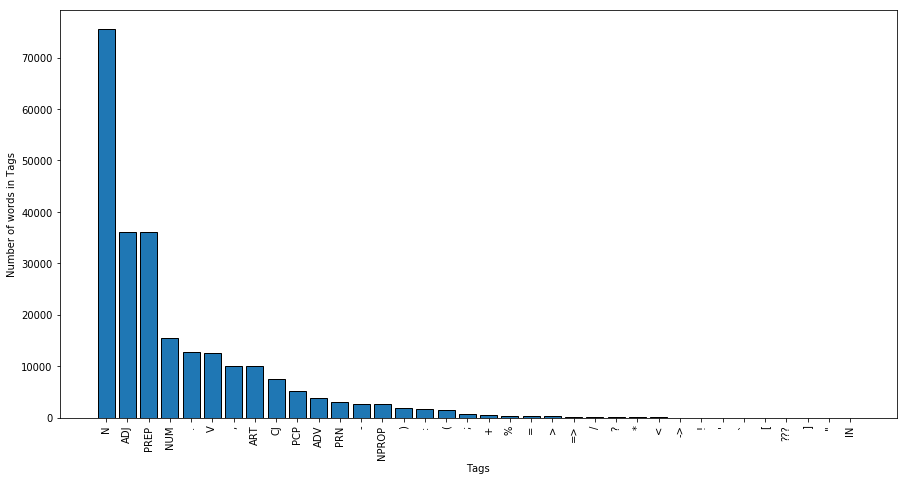

In [39]:
plt.figure(figsize=(15,7.5))
plt.xticks(rotation='vertical')
plt.bar(range(len(dictTags)),values,tick_label=keys, edgecolor="black")
plt.savefig('bar.png')
plt.xlabel("Tags")
plt.ylabel("Number of words in Tags")
plt.show()

